<a href="https://colab.research.google.com/github/priyanshu0827/Projects/blob/main/CSI_Dataprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('titanic.csv')


In [22]:
df.shape

(712, 14)

In [23]:
df.dtypes

PassengerId      int64
Survived         int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
1                 bool
2                 bool
3                 bool
female            bool
male              bool
C                 bool
Q                 bool
S                 bool
dtype: object

In [ ]:
df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [24]:
df.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,1,0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True
1,2,1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False
2,3,1,26.0,0,0,7.9250,False,False,True,True,False,False,False,True
3,4,1,35.0,1,0,53.1000,True,False,False,True,False,False,False,True
4,5,0,35.0,0,0,8.0500,False,False,True,False,True,False,False,True
6,7,0,54.0,0,0,51.8625,True,False,False,False,True,False,False,True
7,8,0,2.0,3,1,21.0750,False,False,True,False,True,False,False,True
8,9,1,27.0,0,2,11.1333,False,False,True,True,False,False,False,True
9,10,1,14.0,1,0,30.0708,False,True,False,True,False,True,False,False
10,11,1,4.0,1,1,16.7000,False,False,True,True,False,False,False,True


In [25]:
df.isnull()

,PassengerId,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,False,False,False,False,False,False,False,False,False,False,False,False,False,False
886,False,False,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
avg_nor_loss = df['Age'].astype("float").mean()
avg_nor_loss

29.64209269662921

In [27]:
df['Age'].replace(np.nan, avg_nor_loss, inplace = True)
df.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,1,0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True
1,2,1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False
2,3,1,26.0,0,0,7.9250,False,False,True,True,False,False,False,True
3,4,1,35.0,1,0,53.1000,True,False,False,True,False,False,False,True
4,5,0,35.0,0,0,8.0500,False,False,True,False,True,False,False,True
6,7,0,54.0,0,0,51.8625,True,False,False,False,True,False,False,True
7,8,0,2.0,3,1,21.0750,False,False,True,False,True,False,False,True
8,9,1,27.0,0,2,11.1333,False,False,True,True,False,False,False,True
9,10,1,14.0,1,0,30.0708,False,True,False,True,False,True,False,False
10,11,1,4.0,1,1,16.7000,False,False,True,True,False,False,False,True


In [4]:
cols = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols, axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


In [8]:
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))

In [13]:
titanic_dummies = pd.concat(dummies, axis=1)

In [14]:
df = pd.concat((df,titanic_dummies), axis=1)

In [15]:
df = df.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Age          712 non-null    float64
 3   SibSp        712 non-null    int64  
 4   Parch        712 non-null    int64  
 5   Fare         712 non-null    float64
 6   1            712 non-null    bool   
 7   2            712 non-null    bool   
 8   3            712 non-null    bool   
 9   female       712 non-null    bool   
 10  male         712 non-null    bool   
 11  C            712 non-null    bool   
 12  Q            712 non-null    bool   
 13  S            712 non-null    bool   
dtypes: bool(8), float64(2), int64(4)
memory usage: 44.5 KB


In [17]:
df['Age'] = df['Age'].interpolate()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Age          712 non-null    float64
 3   SibSp        712 non-null    int64  
 4   Parch        712 non-null    int64  
 5   Fare         712 non-null    float64
 6   1            712 non-null    bool   
 7   2            712 non-null    bool   
 8   3            712 non-null    bool   
 9   female       712 non-null    bool   
 10  male         712 non-null    bool   
 11  C            712 non-null    bool   
 12  Q            712 non-null    bool   
 13  S            712 non-null    bool   
dtypes: bool(8), float64(2), int64(4)
memory usage: 44.5 KB


In [19]:
X = df.values
y = df['Survived'].values

In [20]:
X = np.delete(X, 1, axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
import matplotlib.pyplot as plt

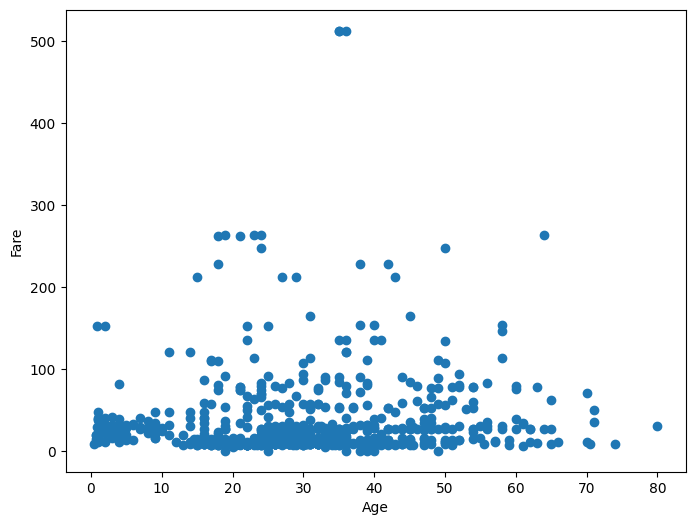

In [30]:
fig, ax=plt.subplots(figsize=(8,6))
ax.scatter(df['Age'], df['Fare'])
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.show()

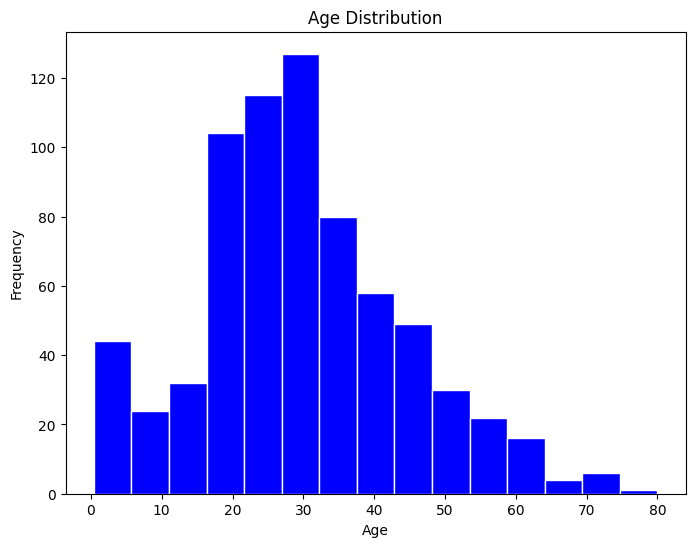

In [31]:
fig, ax=plt.subplots(figsize=(8,6))
ax=plt.hist(df['Age'], bins=15, color = 'b', edgecolor='w')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

         sqrt           exp       log  reciprocal
0    4.690416  3.584913e+09  3.091042    0.045455
1    6.164414  3.185593e+16  3.637586    0.026316
2    5.099020  1.957296e+11  3.258097    0.038462
3    5.916080  1.586013e+15  3.555348    0.028571
4    5.916080  1.586013e+15  3.555348    0.028571
..        ...           ...       ...         ...
885  6.244998  8.659340e+16  3.663562    0.025641
886  5.196152  5.320482e+11  3.295837    0.037037
887  4.358899  1.784823e+08  2.944439    0.052632
889  5.099020  1.957296e+11  3.258097    0.038462
890  5.656854  7.896296e+13  3.465736    0.031250

[712 rows x 4 columns]


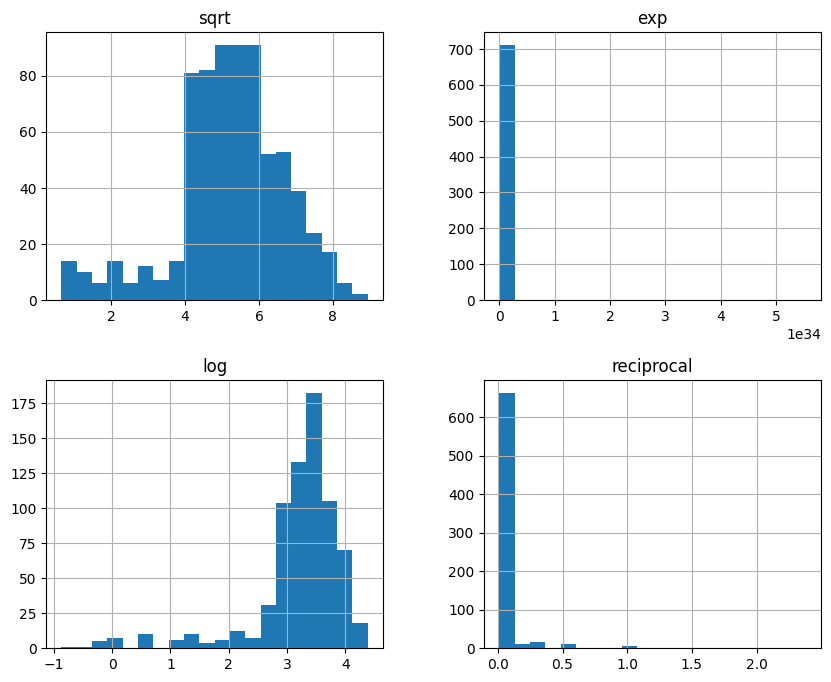

In [32]:
age_tr=df['Age'].transform([np.sqrt, np.exp, np.log, np.reciprocal])
print(age_tr)
age_tr.hist(bins=20, layout=(2,2), figsize=(10, 8))
plt.show()

In [35]:
import category_encoders as ce

data = {'Sex': ['Male', 'Female', 'Female', 'Male', 'Female'], 'Target': [1, 0, 0, 1, 1]}
df = pd.DataFrame(data)

# Define the feature and target
X = df[['Sex']]
y = df['Target']

# Initialize and fit-transform the target encoder
encoder = ce.TargetEncoder(cols='Sex')
df['Sex_encoded'] = encoder.fit_transform(X, y)
df.head()

,Sex,Target,Sex_encoded
0,Male,1,0.656740
1,Female,0,0.558809
2,Female,0,0.558809
3,Male,1,0.656740
4,Female,1,0.558809
